<a href="https://colab.research.google.com/github/Jpsama1236/ML_algorithms/blob/main/imputation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [21]:
df=pd.read_csv('/content/titanic_toy - Sheet1.csv')

In [22]:
df.head()

,Age,Fare,Family,Survived
0,679,18.0,9.8417,0
1,680,43.0,46.9000,7
2,681,36.0,512.3292,1
3,682,NaN,8.1375,0
4,683,27.0,76.7292,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [24]:
df.isnull().mean() *100

Age          0.000000
Fare        16.355140
Family       4.205607
Survived     0.000000
dtype: float64

In [26]:
X=df.drop(columns=['Survived'],axis=1)
y=df['Survived']

In [28]:
X.head()

,Age,Fare,Family
0,679,18.0,9.8417
1,680,43.0,46.9000
2,681,36.0,512.3292
3,682,NaN,8.1375
4,683,27.0,76.7292


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape, X_test.shape

((171, 3), (43, 3))

In [37]:
X_train['Age'].isnull().mean()

0.0

In [32]:
age_mean = X_train['Age'].mean()
age_median = X_train['Age'].median()

fare_mean=X_train['Fare'].mean()
fare_median=X_train['Fare'].median()

In [33]:
X_train['age_mean']=X_train['Age'].fillna(age_mean)
X_train['age_median']=X_train['Age'].fillna(age_median)
X_train['fare_mean']=X_train['Fare'].fillna(fare_mean)
X_train['fare_median']=X_train['Fare'].fillna(fare_median)

In [35]:
X_train.head()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
2,681,36.0,512.3292,681,681,36.000000,36.0
213,892,32.0,7.7500,892,892,32.000000,32.0
3,682,NaN,8.1375,682,682,28.902042,27.5
164,843,16.0,10.5000,843,843,16.000000,16.0
14,693,4.0,13.4167,693,693,4.000000,4.0


In [36]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['age_median'].var())
print('Age Variance after mean imputation: ', X_train['age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['fare_mean'].var())

Original Age variable variance:  3616.351977984176
Age Variance after median imputation:  3616.351977984176
Age Variance after mean imputation:  3616.351977984176
Original Fare variable variance:  211.84427452302467
Fare Variance after median imputation:  175.98459402132784
Fare Variance after mean imputation:  175.70613357497928


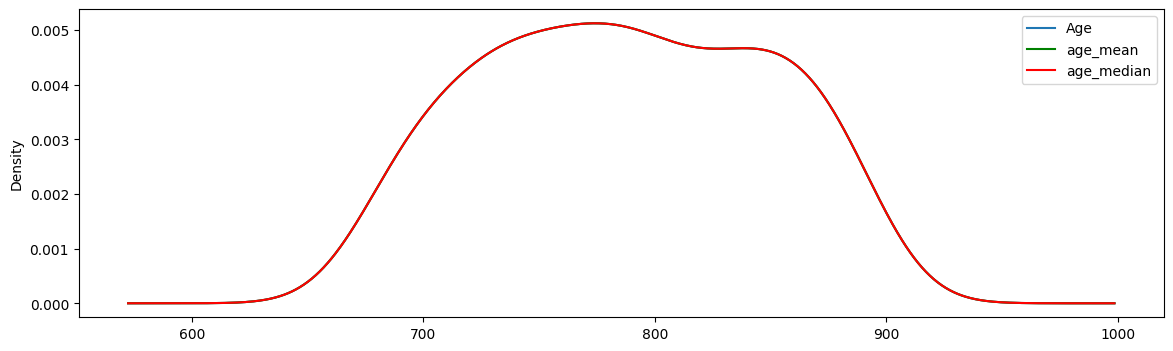

In [39]:
fig=plt.figure(figsize=(14,4))
ax=fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)
X_train['age_mean'].plot(kind='kde', ax=ax ,color='green')
X_train['age_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

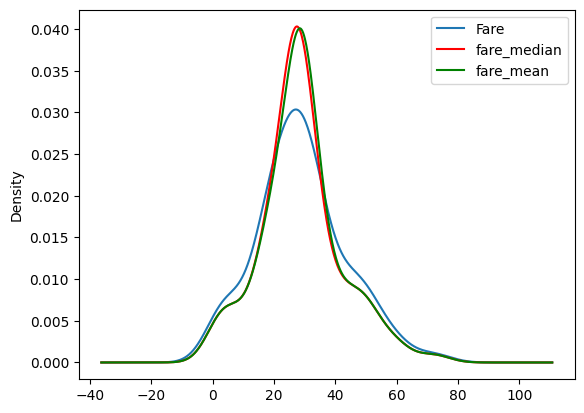

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [41]:
X_train.cov()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,3616.351978,-8.996523,-515.156076,3616.351978,3616.351978,-7.461822,-5.804644
Fare,-8.996523,211.844275,161.399206,-8.996523,-8.996523,211.844275,211.844275
Family,-515.156076,161.399206,3968.108673,-515.156076,-515.156076,132.685323,135.047882
age_mean,3616.351978,-8.996523,-515.156076,3616.351978,3616.351978,-7.461822,-5.804644
age_median,3616.351978,-8.996523,-515.156076,3616.351978,3616.351978,-7.461822,-5.804644
fare_mean,-7.461822,211.844275,132.685323,-7.461822,-7.461822,175.706134,175.706134
fare_median,-5.804644,211.844275,135.047882,-5.804644,-5.804644,175.706134,175.984594


In [42]:
X_train.corr()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,1.000000,-0.010081,-0.137349,1.000000,1.000000,-0.009361,-0.007276
Fare,-0.010081,1.000000,0.162129,-0.010081,-0.010081,1.000000,1.000000
Family,-0.137349,0.162129,1.000000,-0.137349,-0.137349,0.159173,0.161934
age_mean,1.000000,-0.010081,-0.137349,1.000000,1.000000,-0.009361,-0.007276
age_median,1.000000,-0.010081,-0.137349,1.000000,1.000000,-0.009361,-0.007276
fare_mean,-0.009361,1.000000,0.159173,-0.009361,-0.009361,1.000000,0.999209
fare_median,-0.007276,1.000000,0.161934,-0.007276,-0.007276,0.999209,1.000000


<Axes: >

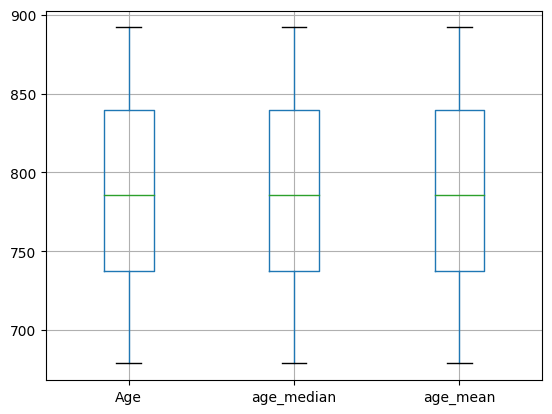

In [44]:
X_train[['Age', 'age_median', 'age_mean']].boxplot()

<Axes: >

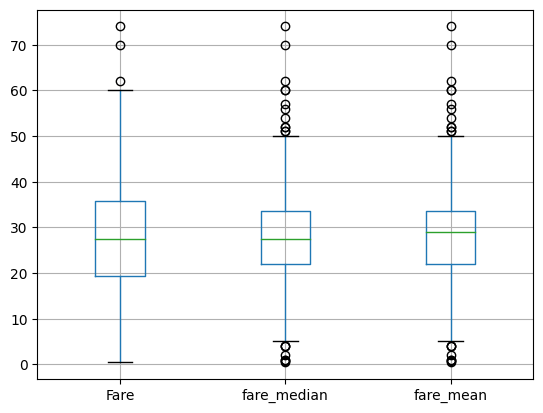

In [46]:
X_train[['Fare', 'fare_median', 'fare_mean']].boxplot()

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [49]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [58]:
trf.fit_transform(X_train)

In [54]:
trf.named_transformers_['imputer1'].statistics_

array([786.])

In [55]:
trf.named_transformers_['imputer2'].statistics_

array([28.90204225])

In [56]:
X_test = trf.transform(X_test)

In [60]:
X_test

array([[7.02000000e+02, 1.80000000e+01, 2.27525000e+02],
       [8.34000000e+02, 2.89020423e+01, 7.22920000e+00],
       [8.86000000e+02, 2.50000000e+01, 7.05000000e+00],
       [6.92000000e+02, 3.10000000e+01, 5.70000000e+01],
       [7.43000000e+02, 3.60000000e+01, 7.88500000e+01],
       [8.10000000e+02, 3.90000000e+01, 1.30000000e+01],
       [8.20000000e+02, 4.30000000e+01, 6.45000000e+00],
       [8.72000000e+02, 2.60000000e+01, 7.89580000e+00],
       [7.72000000e+02, 2.40000000e+01, 9.50000000e+00],
       [7.09000000e+02, 4.20000000e+01, 2.62875000e+01],
       [6.89000000e+02, 1.90000000e+01, 1.01708000e+01],
       [7.68000000e+02, 2.89020423e+01, 3.96000000e+01],
       [8.55000000e+02, 1.60000000e+01, 3.94000000e+01],
       [7.44000000e+02, 2.10000000e+01, 2.62375000e+02],
       [8.18000000e+02, 2.30000000e+01,            nan],
       [7.14000000e+02, 4.80000000e+01, 5.20000000e+01],
       [7.50000000e+02, 1.90000000e+01, 5.31000000e+01],
       [8.21000000e+02, 1.00000